# Waiter Tips Prediction


## Data Preprocessing


### Import Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Load the data

In [106]:
Tips_Data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv")

### EDA

#### Describe the data

In [107]:
Tips_Data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [108]:
Tips_Data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [109]:
Tips_Data.shape

(244, 7)

In [110]:
Tips_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [111]:
Tips_Data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [112]:
Tips_Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

#### Visualize the data

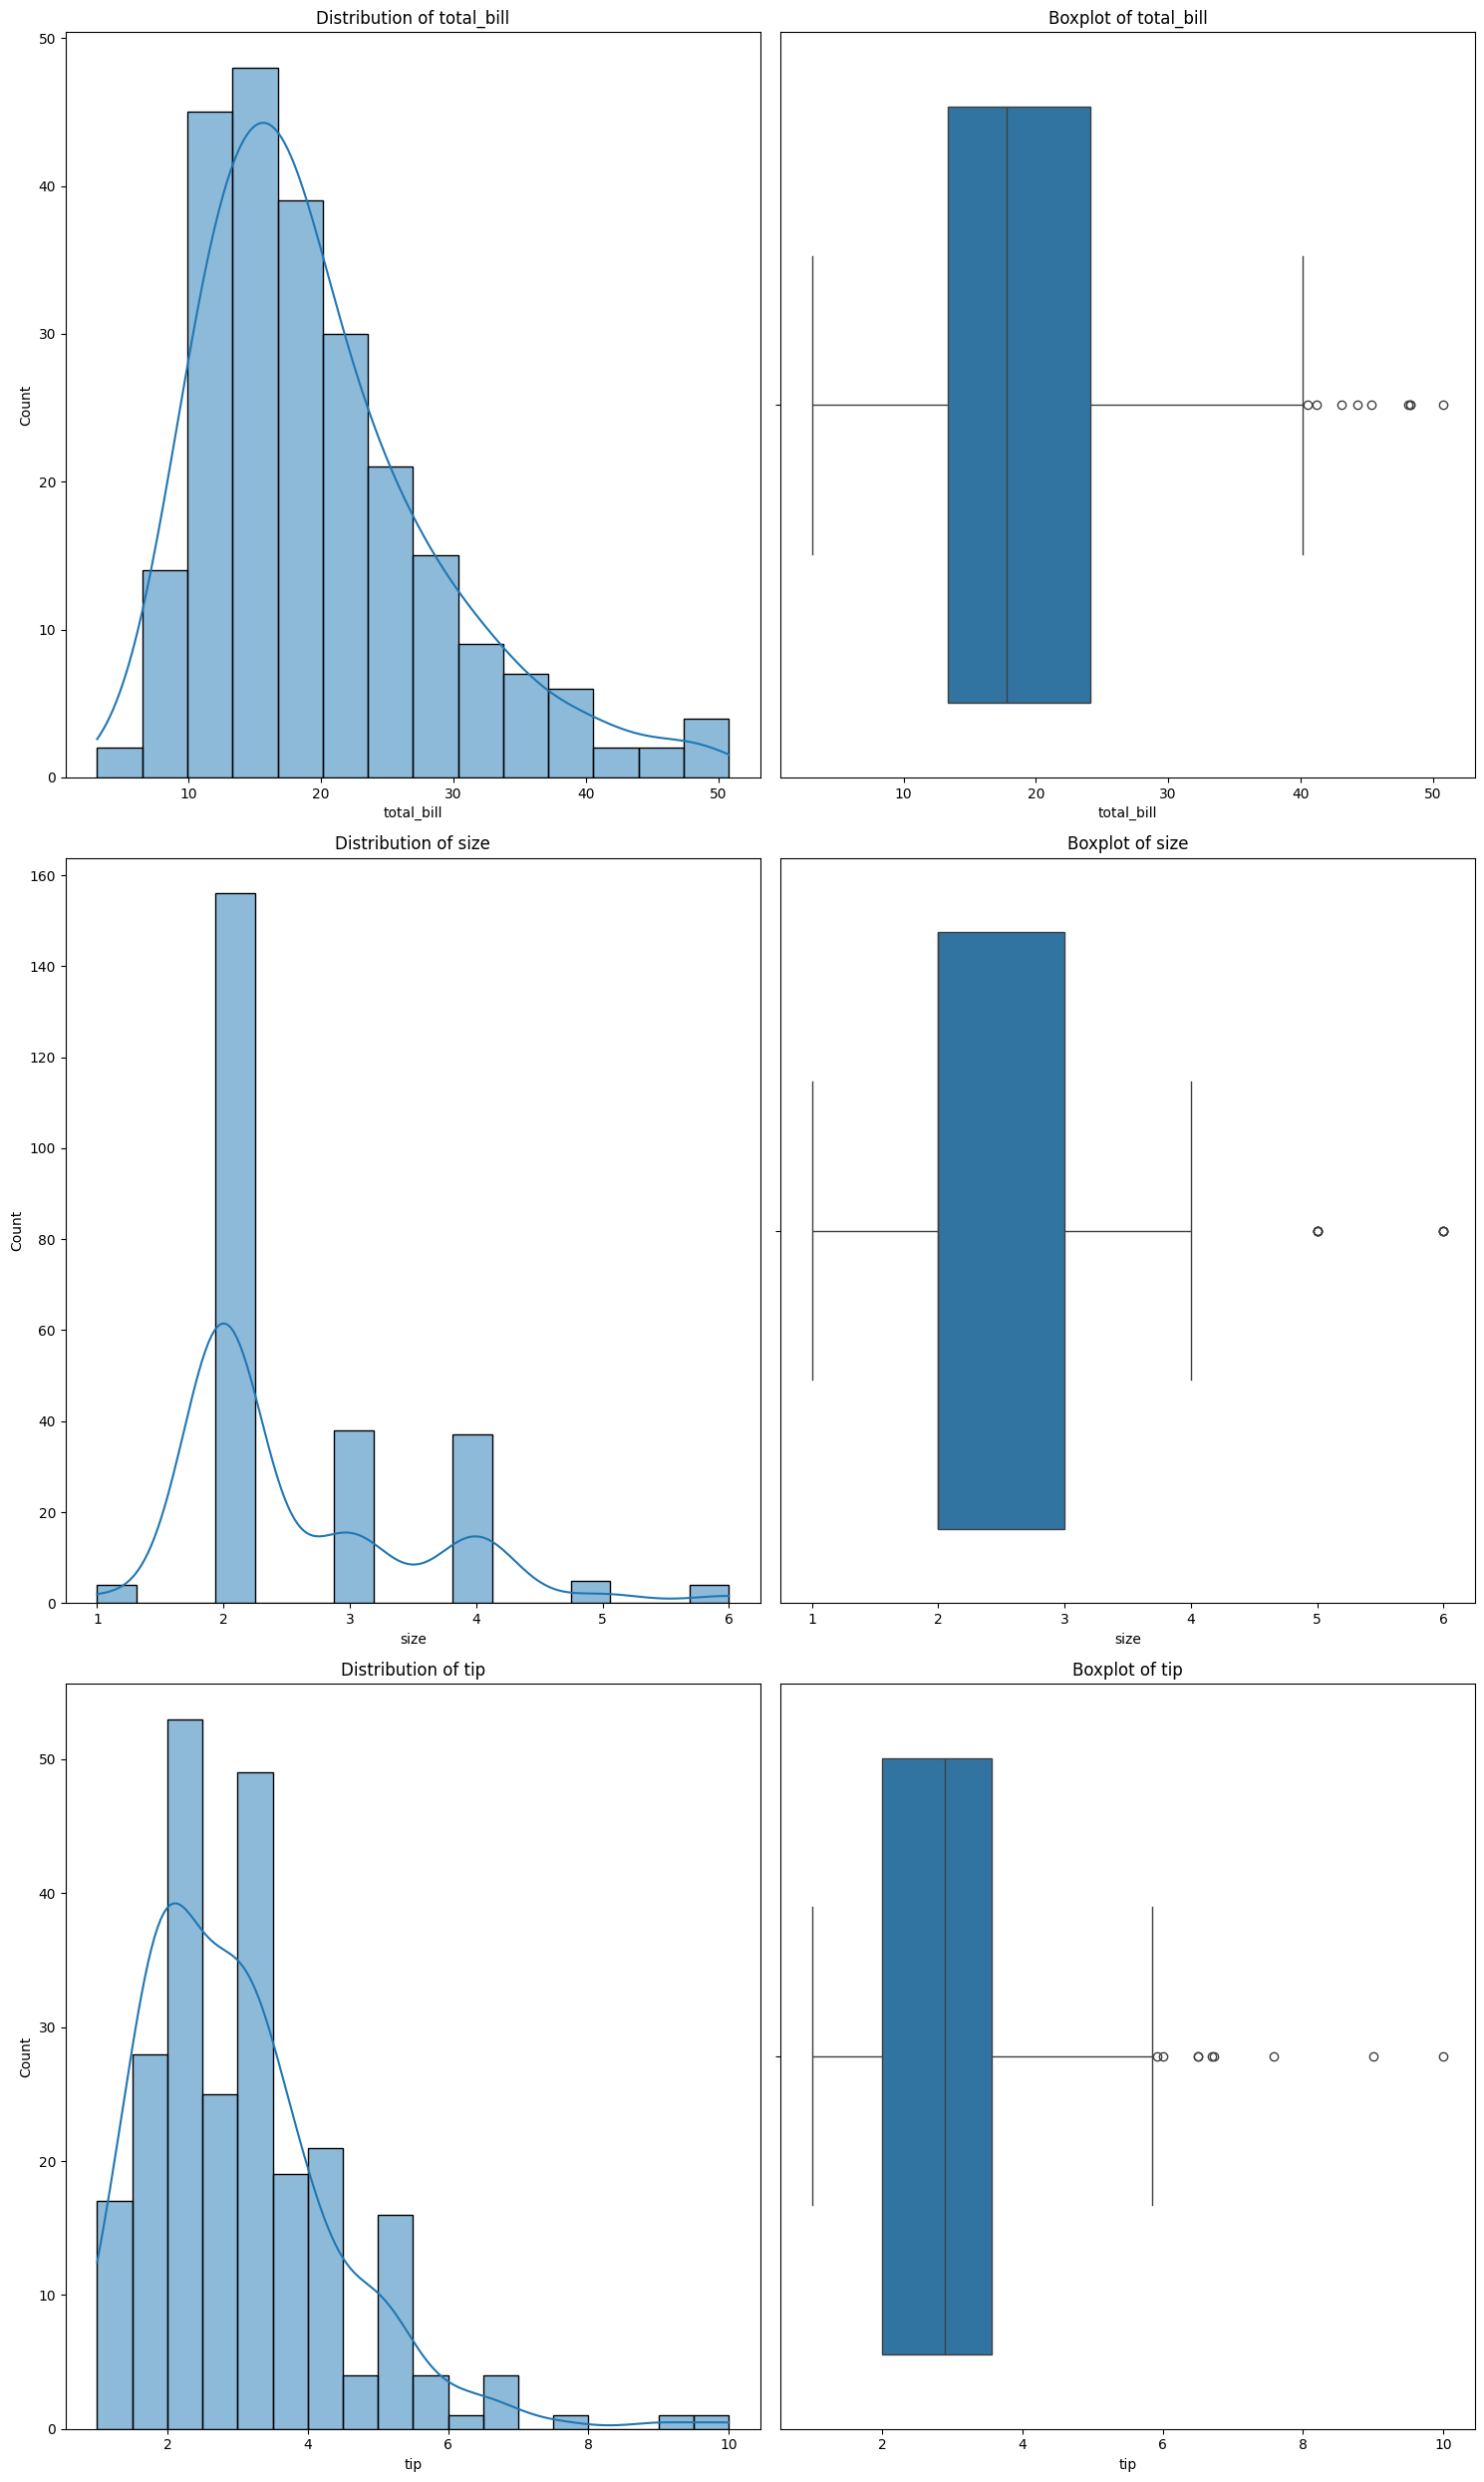

In [113]:
fig, axes = plt.subplots(3, 2, figsize=(15, 25))

# first feature
sns.histplot(Tips_Data['total_bill'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of total_bill')
sns.boxplot(x=Tips_Data['total_bill'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of total_bill')

# Second feature
sns.histplot(Tips_Data['size'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of size')
sns.boxplot(x=Tips_Data['size'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of size')

# Target
sns.histplot(Tips_Data['tip'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of tip')
sns.boxplot(x=Tips_Data['tip'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of tip')

plt.tight_layout() #is a function used to automatically adjust the spacing of subplots in a figure to prevent overlapping content.
plt.show()

Text(0.5, 1.0, 'size vs tip')

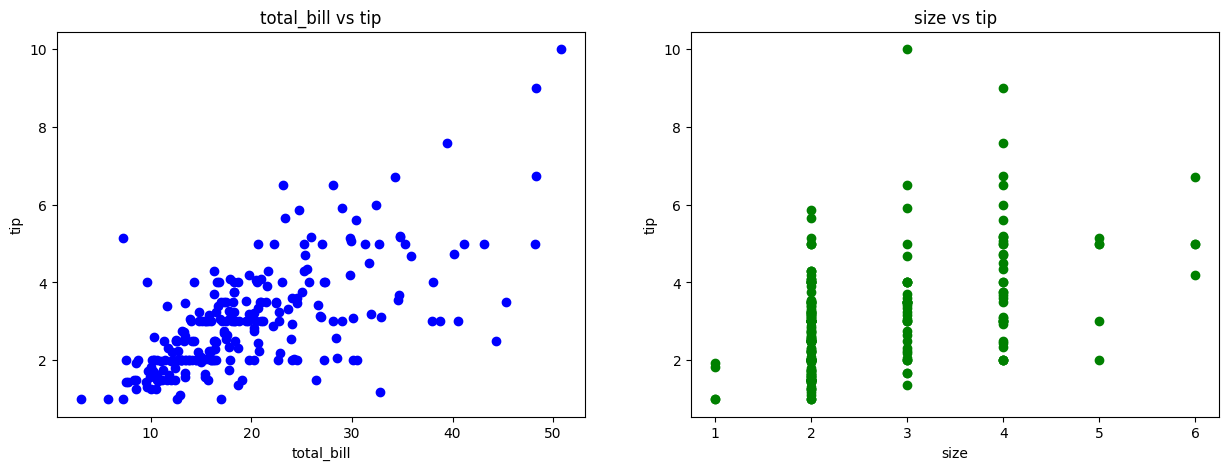

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(Tips_Data['total_bill'], Tips_Data['tip'], color='blue')
axes[0].set_xlabel('total_bill')
axes[0].set_ylabel('tip')
axes[0].set_title('total_bill vs tip')

# Scatter plot for size vs tip
axes[1].scatter(Tips_Data['size'], Tips_Data['tip'], color='green')
axes[1].set_xlabel('size')
axes[1].set_ylabel('tip')
axes[1].set_title('size vs tip')


### Cleaning the data

#### Removing Outliers

In [142]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_total_bill = Tips_Data['total_bill'].quantile(0.25)
Q3_total_bill = Tips_Data['total_bill'].quantile(0.75)
IQR_total_bill = Q3_total_bill - Q1_total_bill

Q1_size = Tips_Data['size'].quantile(0.25)
Q3_size = Tips_Data['size'].quantile(0.75)
IQR_size = Q3_size - Q1_size

Q1_tip = Tips_Data['tip'].quantile(0.25)
Q3_tip = Tips_Data['tip'].quantile(0.75)
IQR_tip = Q3_tip - Q1_tip

lower_bound_total_bill = Q1_total_bill - 1.5 * IQR_total_bill
upper_bound_total_bill = Q3_total_bill + 1.5 * IQR_total_bill

lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

lower_bound_tip = Q1_tip - 1.5 * IQR_tip
upper_bound_tip = Q3_tip + 1.5 * IQR_tip
# Remove outliers
Tips_Data_no_outliers = Tips_Data[(Tips_Data['total_bill'] >= lower_bound_total_bill) & (Tips_Data['total_bill'] <= upper_bound_total_bill) &
                                  (Tips_Data['size'] >= lower_bound_size) & (Tips_Data['size'] <= upper_bound_size) & 
                                  (Tips_Data['tip'] >= lower_bound_tip) & (Tips_Data['tip'] <= upper_bound_tip)]
                  

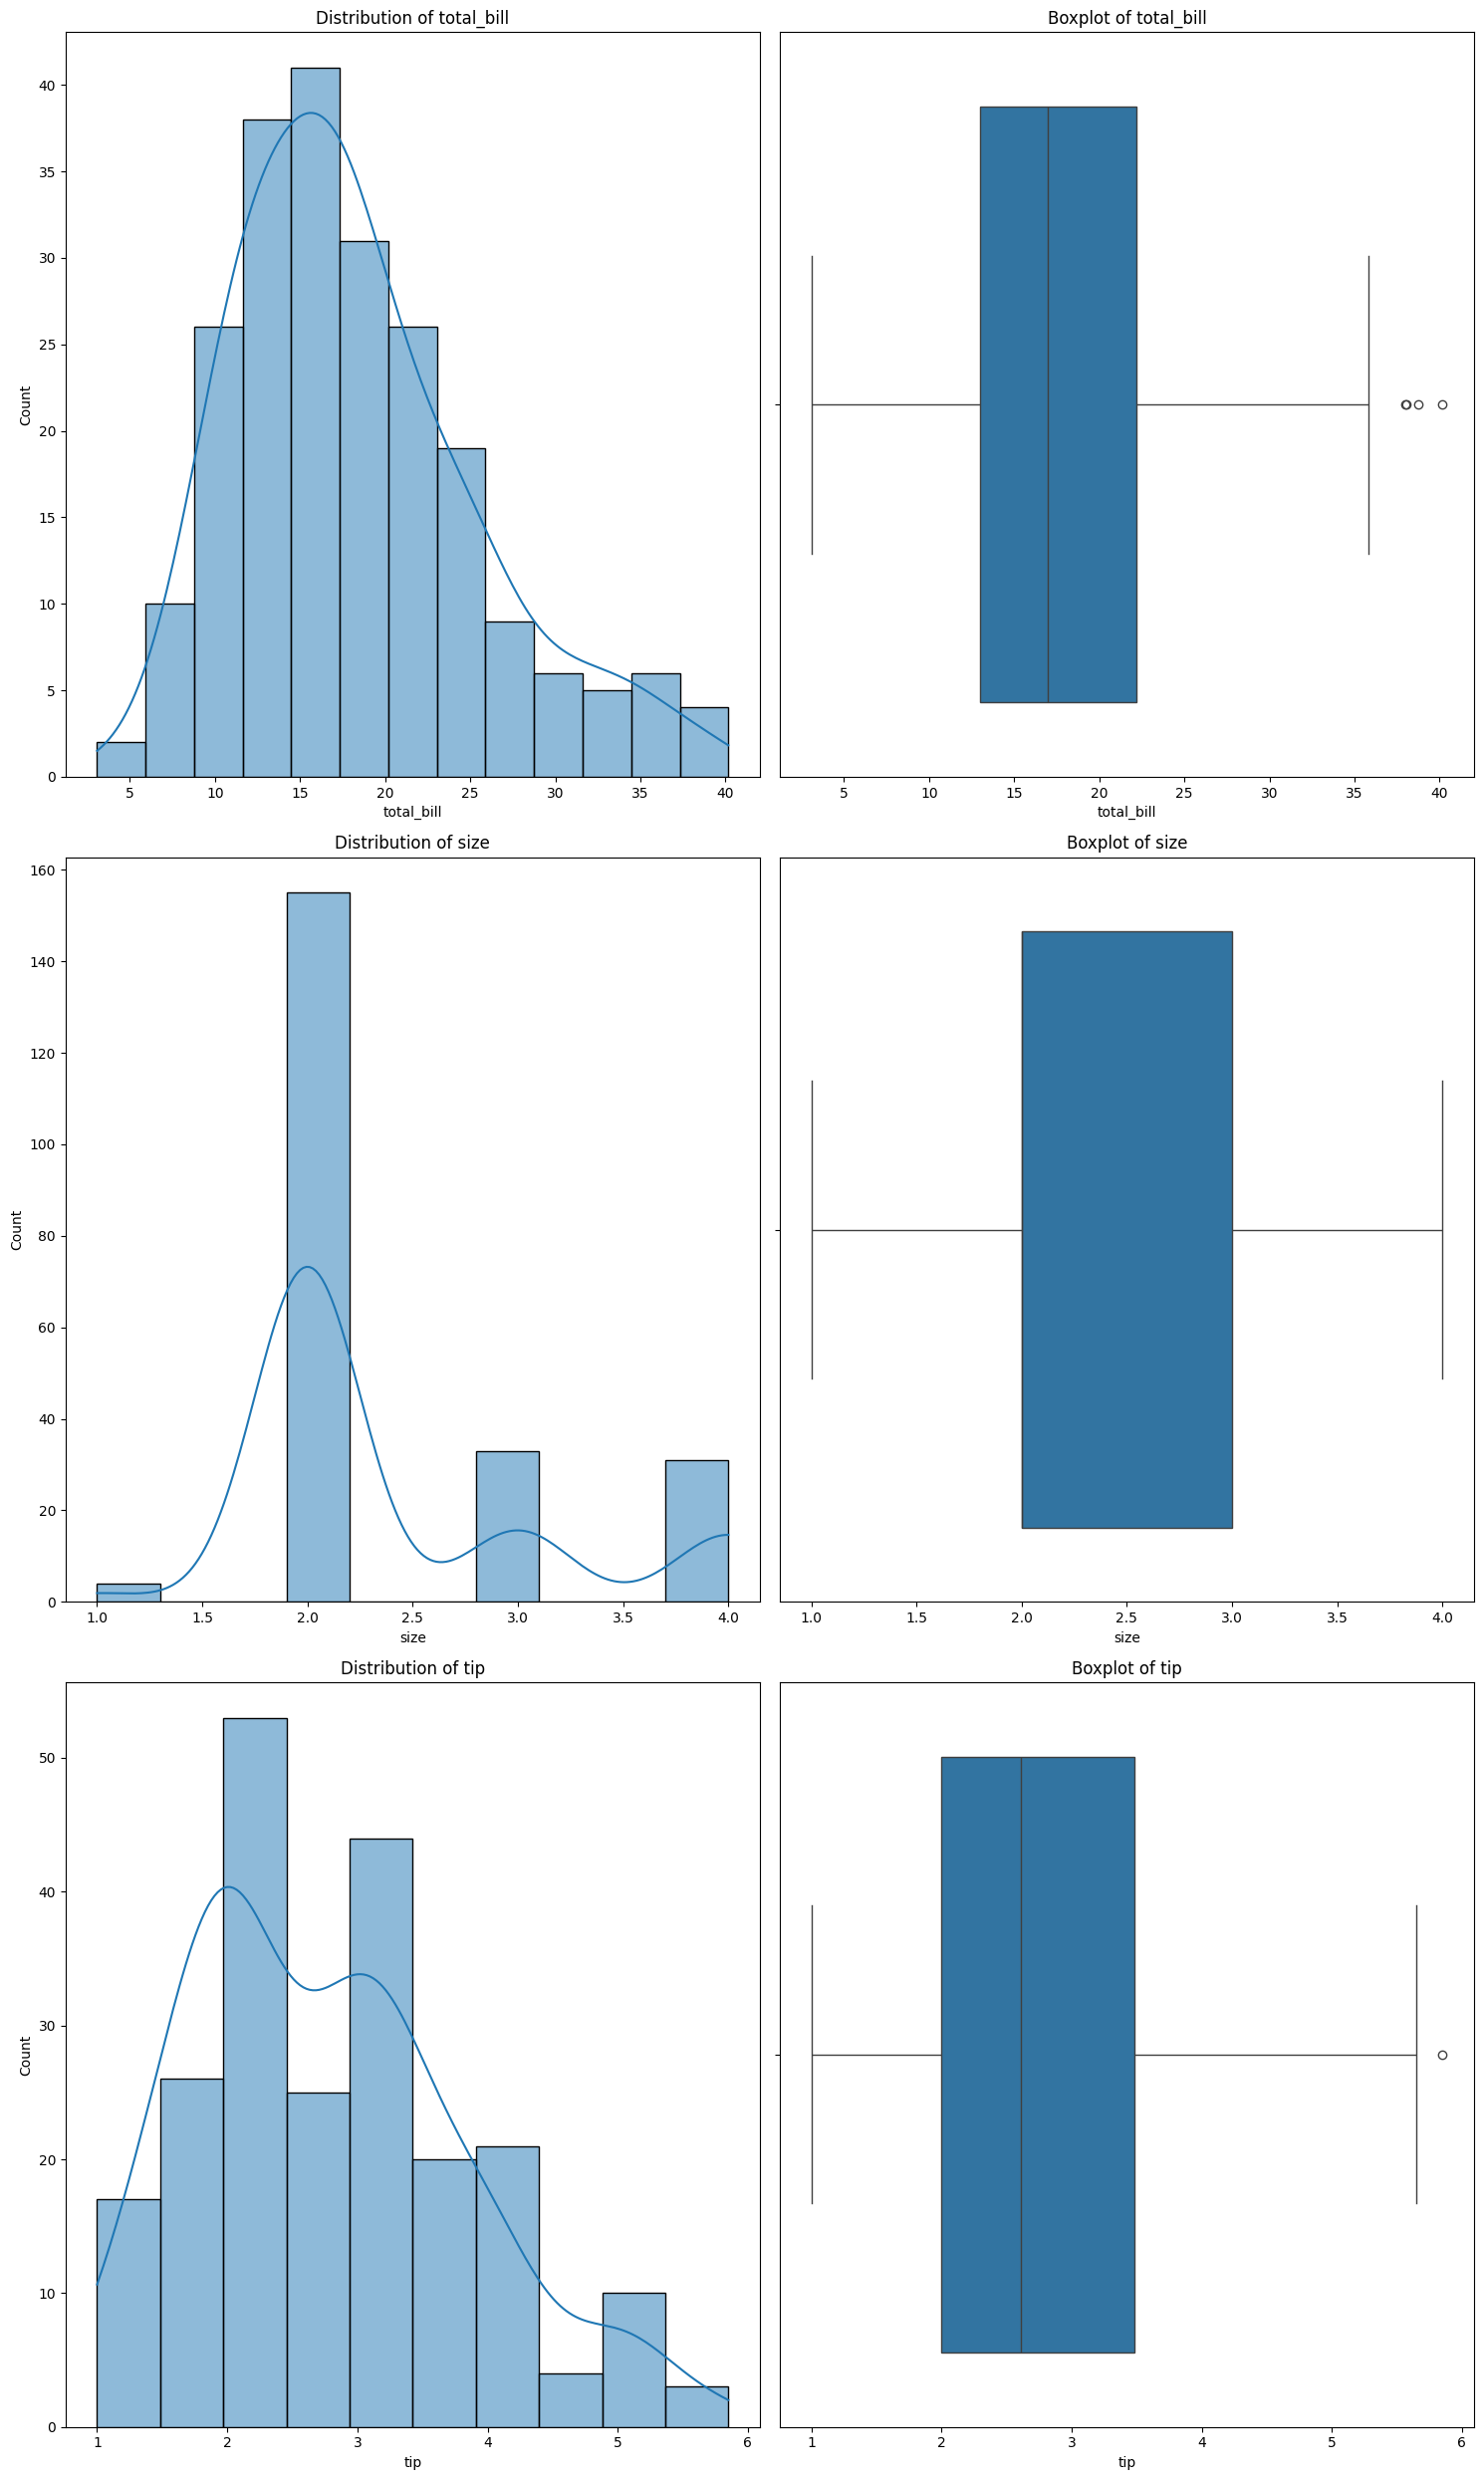

In [143]:
fig, axes = plt.subplots(3, 2, figsize=(15, 25))

# first feature
sns.histplot(Tips_Data_no_outliers ['total_bill'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of total_bill')
sns.boxplot(x=Tips_Data_no_outliers ['total_bill'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of total_bill')

# Second feature
sns.histplot(Tips_Data_no_outliers['size'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of size')
sns.boxplot(x=Tips_Data_no_outliers ['size'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of size')

# Target
sns.histplot(Tips_Data_no_outliers['tip'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of tip')
sns.boxplot(x=Tips_Data_no_outliers['tip'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of tip')

plt.tight_layout() #is a function used to automatically adjust the spacing of subplots in a figure to prevent overlapping content.
plt.show()

### Encoding

In [144]:
Tips_Data_Encoded = pd.get_dummies(Tips_Data_no_outliers, columns=['sex', 'smoker','day','time'])

<Axes: >

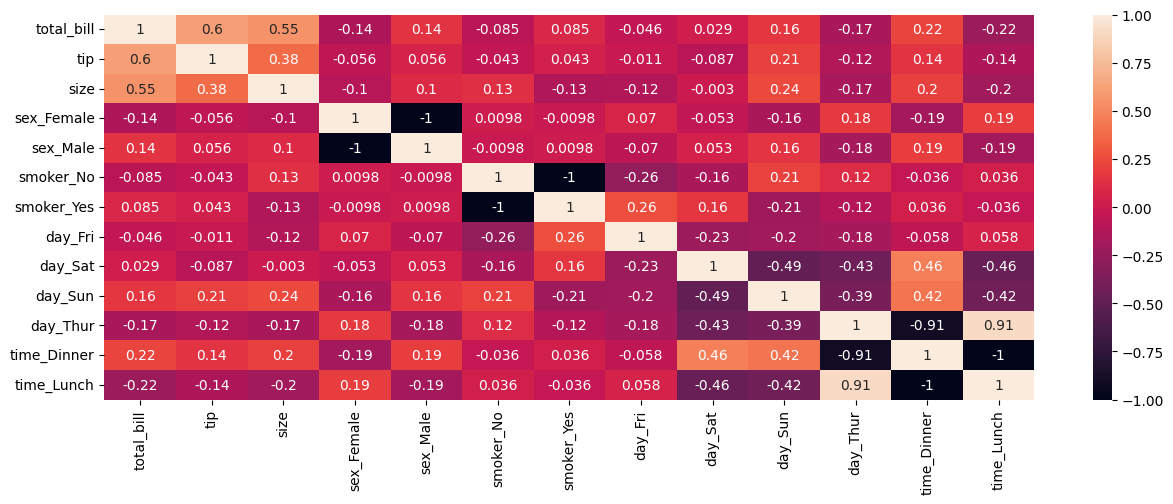

In [145]:
corr_matrix = Tips_Data_Encoded.corr()
plt.figure(figsize = (15,5))
sns.heatmap(data = corr_matrix, annot = True)

#### Scaling

In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Tips_Data_Encoded .drop(columns = ['tip']))

### Train Test Split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Tips_Data_Encoded ['tip'], test_size=0.2, random_state=42)

## Training 

In [148]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [149]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [150]:
print("Training Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Testing Mean Squared Error:", mean_squared_error(y_test, y_test_pred))

Training Mean Squared Error: 0.7385401480196838
Testing Mean Squared Error: 0.5302606901799165


In [151]:
model.coef_

array([ 0.58959953,  0.02880174,  0.04174055, -0.04174055, -0.02458999,
        0.02458999, -0.00603403, -0.05253183,  0.09213713, -0.03578175,
       -0.00525743,  0.00525743])

In [152]:
model.intercept_

np.float64(2.77116238953885)

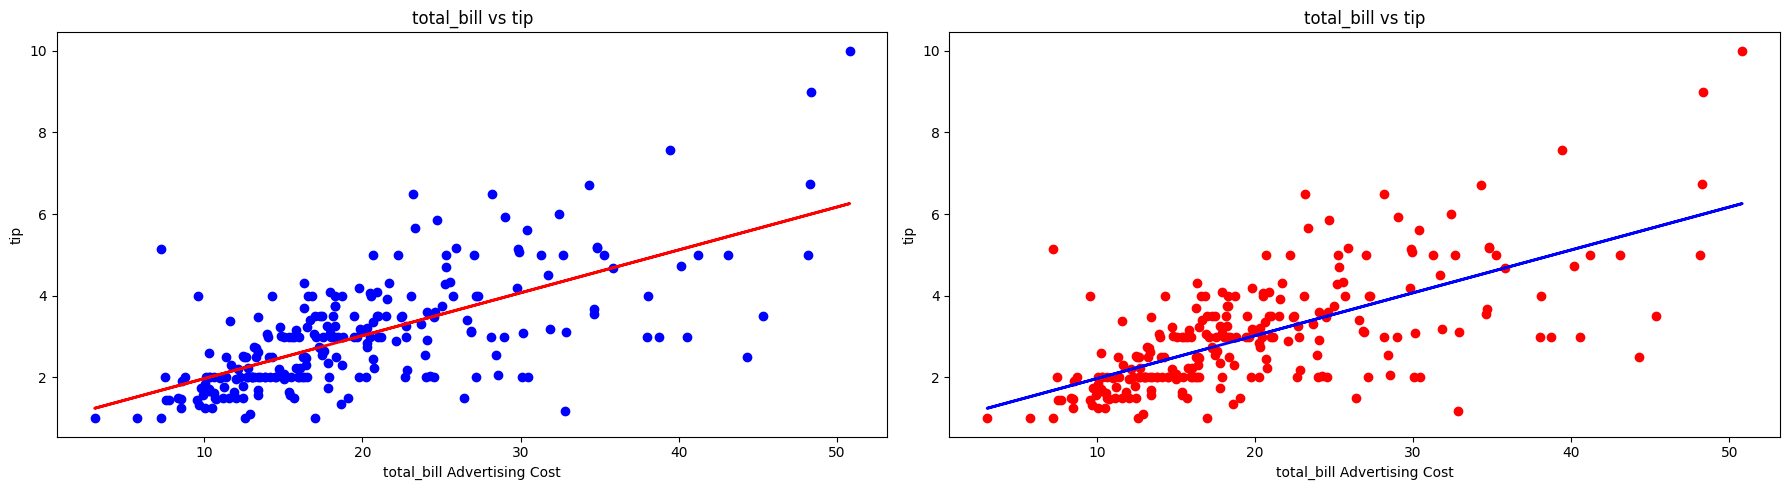

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Scatter plot and regression for total_bill vs tip
axes[0].scatter(Tips_Data['total_bill'], Tips_Data['tip'], color='blue')
model_total_bill = LinearRegression()
X_total_bill = Tips_Data[['total_bill']]
y_total_bill = Tips_Data['tip']
model_total_bill.fit(X_total_bill, y_total_bill)
y_total_bill_pred = model_total_bill.predict(X_total_bill)
axes[0].plot(Tips_Data['total_bill'], y_total_bill_pred, color='red', linewidth=2)
axes[0].set_xlabel('total_bill Advertising Cost')
axes[0].set_ylabel('tip')
axes[0].set_title('total_bill vs tip')

# Scatter plot and regression for total_bill vs tip
axes[1].scatter(Tips_Data['total_bill'], Tips_Data['tip'], color='red')
model_total_bill = LinearRegression()
X_total_bill = Tips_Data[['total_bill']]
y_total_bill = Tips_Data['tip']
model_total_bill.fit(X_total_bill, y_total_bill)
y_total_bill_pred = model_total_bill.predict(X_total_bill)
axes[1].plot(Tips_Data['total_bill'], y_total_bill_pred, color='blue', linewidth=2)
axes[1].set_xlabel('total_bill Advertising Cost')
axes[1].set_ylabel('tip')
axes[1].set_title('total_bill vs tip')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [154]:
model.score(X_train, y_train)

0.36641135360929133

In [155]:
model.score(X_test, y_test)

0.4395689103225352